In [0]:
import random
random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

listings = pd.read_csv('listings_detail.csv', delimiter=',',low_memory=False)

listings = listings[listings['accommodates'] != 0]
listings = listings[listings['bedrooms'] != 0]
listings = listings[listings['beds'] != 0]
listings = listings[listings['price'] != 0.00]
print(len(listings))

listings = listings[listings['beds'] == min(listings['beds'])]
print(len(listings))

40279
26461


Number of missing review scores ratings: 6442


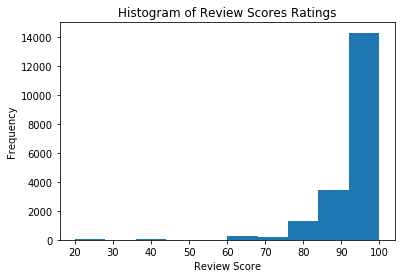

In [0]:
#print(listings['neighbourhood_group_cleansed'].unique())
listings = listings.dropna(how='any', subset=['zipcode','accommodates' ,'property_type', 'bedrooms', 'beds', 'bathrooms'])
print('Number of missing review scores ratings:', len(listings['review_scores_rating'][listings['review_scores_rating'].isnull()]))
plt.hist(listings['review_scores_rating'][~listings['review_scores_rating'].isnull()])
plt.title("Histogram of Review Scores Ratings")
plt.xlabel("Review Score")
plt.ylabel("Frequency")
plt.show()
idx_vals = listings['review_scores_rating'][listings['number_of_reviews'] == 0].index.values.tolist()
listings.loc[idx_vals, ('review_scores_rating')] = listings['review_scores_rating'][listings['number_of_reviews'] == 0].replace('NaN', 'No Reviews')

# remove inconsistent NaN values
listings = listings[~listings['review_scores_rating'].isnull()]
def convert_scores_buckets(val):
    if val == 'No Reviews':
        return 'No Reviews'
    elif val >= 95.0:
        return '95-100'
    elif val >= 90.0 and val < 95.0:
        return '90-94'
    elif val >= 85.0 and val < 90.0:
        return '85-89'
    elif val >= 80.0 and val < 85.0:
        return '80-84'
    elif val >= 70.0 and val < 80.0:
        return '70-79'
    elif val >= 60.0 and val < 70.0:
        return '60-69'
    elif val >= 50.0 and val < 60.0:
        return '50-59'
    elif val >= 40.0 and val < 50.0:
        return '40-49'
    elif val >= 30.0 and val < 40.0:
        return '30-39'
    elif val >= 20.0 and val < 30.0:
        return '20-29'
    elif val >= 10.0 and val < 20.0:
        return '10-19'
    elif val < 10.0:
        return '0-9'

listings['review_scores_rating'] = listings['review_scores_rating'].apply(convert_scores_buckets)

In [0]:
useless = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'city', 'state', 'market', 'smart_location', 'country_code', 'country',
       'is_location_exact', 'weekly_price', 'monthly_price']
listings.drop(useless, axis=1, inplace=True)

In [0]:
drop =[]
for i in listings.filter(regex = 'review').columns:
    if i!='review_scores_rating':
        drop.append(i)
        
print(drop)

listings.drop(drop, axis = 1, inplace = True)
listings.columns
# #add reviews and host_listings_count

['number_of_reviews', 'first_review', 'last_review', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']


Index(['host_response_time', 'host_is_superhost', 'host_total_listings_count',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'zipcode', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'square_feet', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'review_scores_rating', 'requires_license', 'license',
       'jurisdiction_names', 'instant_bookable', 'is_business_travel_ready',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count'],
      dtype='object')

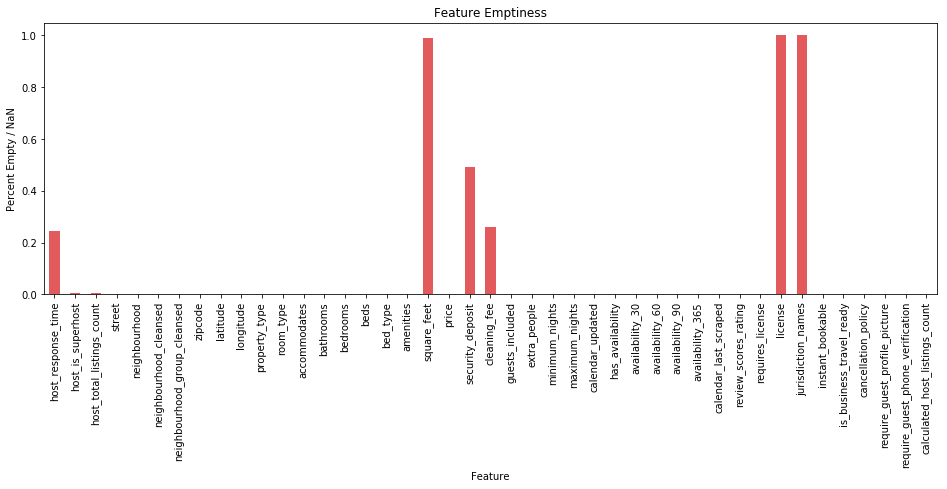

In [0]:
percentage_missing_data = listings.isnull().sum() / listings.shape[0]
ax = percentage_missing_data.plot(kind = 'bar', color='#E35A5C', figsize = (16, 5))
ax.set_xlabel('Feature')
ax.set_ylabel('Percent Empty / NaN')
ax.set_title('Feature Emptiness')
plt.show()

In [0]:
useless = ['square_feet', 'security_deposit', 'cleaning_fee',  'license', 'jurisdiction_names','host_response_time','neighbourhood','neighbourhood_group_cleansed']
listings.drop(useless, axis=1, inplace=True)


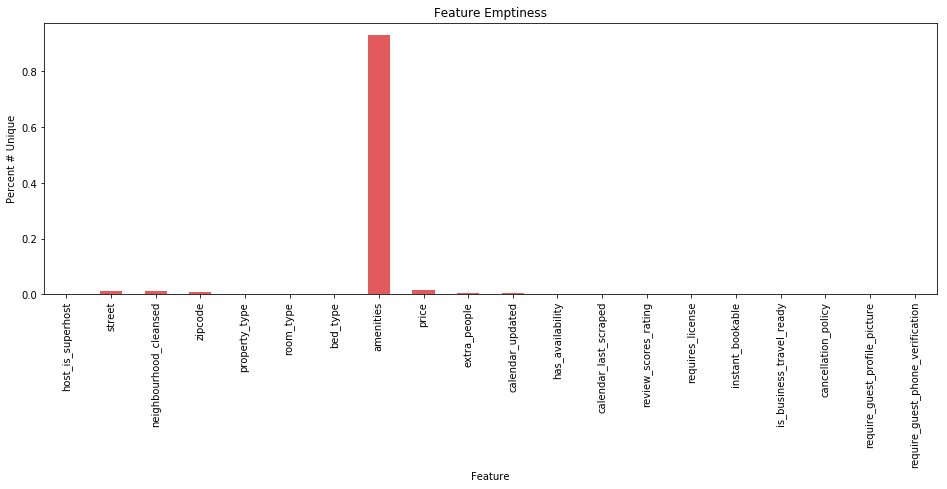

In [0]:
categories = listings.columns[listings.dtypes == 'object']
percentage_unique = listings[categories].nunique() / listings.shape[0]

ax = percentage_unique.plot(kind = 'bar', color='#E35A5C', figsize = (16, 5))
ax.set_xlabel('Feature')
ax.set_ylabel('Percent # Unique')
ax.set_title('Feature Emptiness')
plt.show()

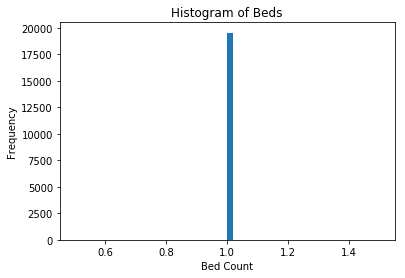

In [0]:
to_drop = ['street', 'amenities', 'calendar_last_scraped', 'calendar_updated']
listings.drop(to_drop, axis=1, inplace=True)
plt.hist(listings['beds'], bins=50)
plt.title("Histogram of Beds")
plt.xlabel("Bed Count")
plt.ylabel("Frequency")
plt.show()

In [0]:
listings['zipcode'] = listings['zipcode'].str.replace(r'-\d+', '')
print("Number of Zipcodes:", listings['zipcode'].nunique())
for col in listings.columns:
    print(col + ', Number of Missing Values:', len(listings[col][listings[col].isnull()]))


Number of Zipcodes: 176
host_is_superhost, Number of Missing Values: 102
host_total_listings_count, Number of Missing Values: 102
neighbourhood_cleansed, Number of Missing Values: 0
zipcode, Number of Missing Values: 0
latitude, Number of Missing Values: 0
longitude, Number of Missing Values: 0
property_type, Number of Missing Values: 0
room_type, Number of Missing Values: 0
accommodates, Number of Missing Values: 0
bathrooms, Number of Missing Values: 0
bedrooms, Number of Missing Values: 0
beds, Number of Missing Values: 0
bed_type, Number of Missing Values: 0
price, Number of Missing Values: 0
guests_included, Number of Missing Values: 0
extra_people, Number of Missing Values: 0
minimum_nights, Number of Missing Values: 0
maximum_nights, Number of Missing Values: 0
has_availability, Number of Missing Values: 0
availability_30, Number of Missing Values: 0
availability_60, Number of Missing Values: 0
availability_90, Number of Missing Values: 0
availability_365, Number of Missing Valu

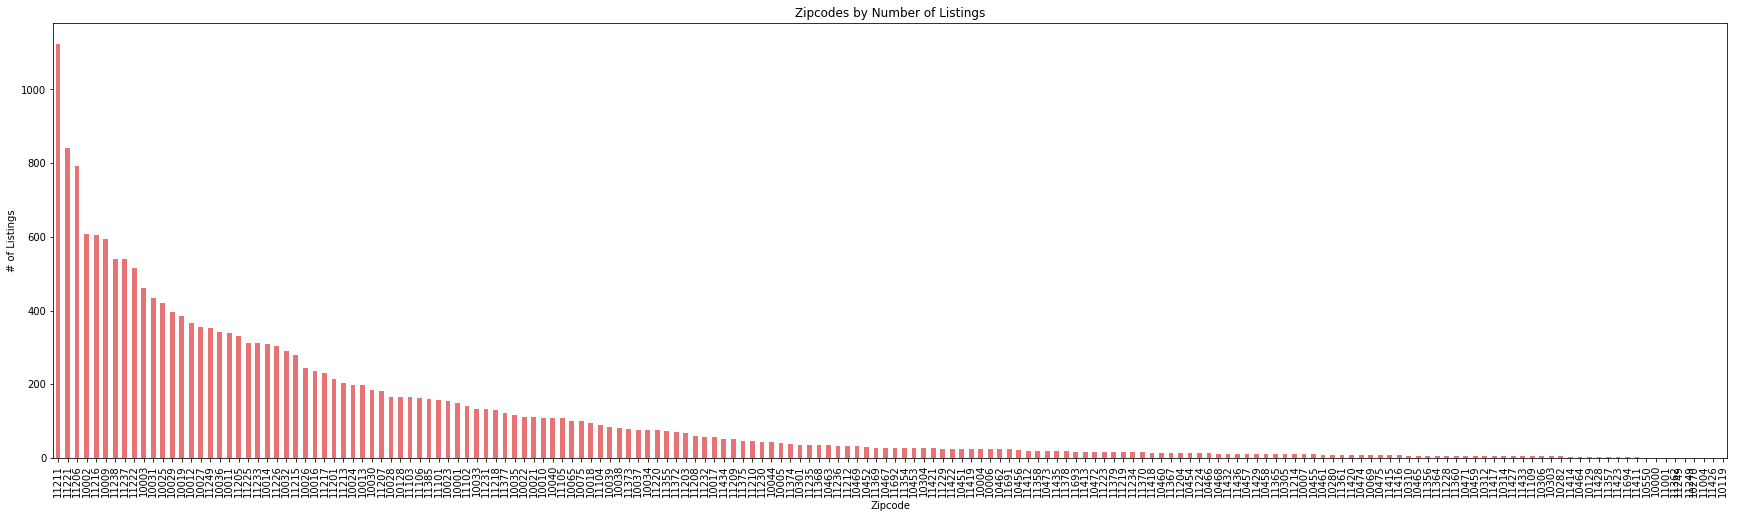

In [0]:
count_per_zipcode = listings['zipcode'].value_counts()
ax = count_per_zipcode.plot(kind='bar', figsize = (30,8), color = '#E35A5C', alpha = 0.85)
ax.set_title("Zipcodes by Number of Listings")
ax.set_xlabel("Zipcode")
ax.set_ylabel("# of Listings")
plt.show()

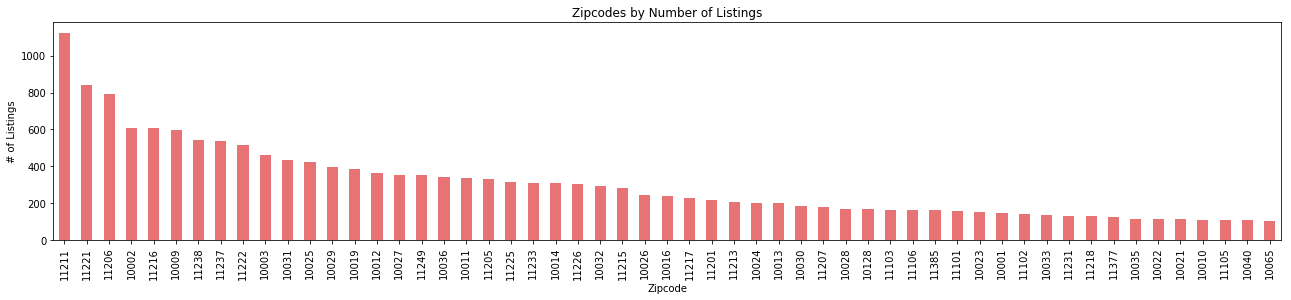

Number of entries removed:  2791


In [0]:
relevant_zipcodes = count_per_zipcode[count_per_zipcode > 100].index
listings_zip_filtered = listings[listings['zipcode'].isin(relevant_zipcodes)]

# Plot new zipcodes distribution
count_per_zipcode = listings_zip_filtered['zipcode'].value_counts()
ax = count_per_zipcode.plot(kind='bar', figsize = (22,4), color = '#E35A5C', alpha = 0.85)
ax.set_title("Zipcodes by Number of Listings")
ax.set_xlabel("Zipcode")
ax.set_ylabel("# of Listings")

plt.show()

print('Number of entries removed: ', listings.shape[0] - listings_zip_filtered.shape[0])

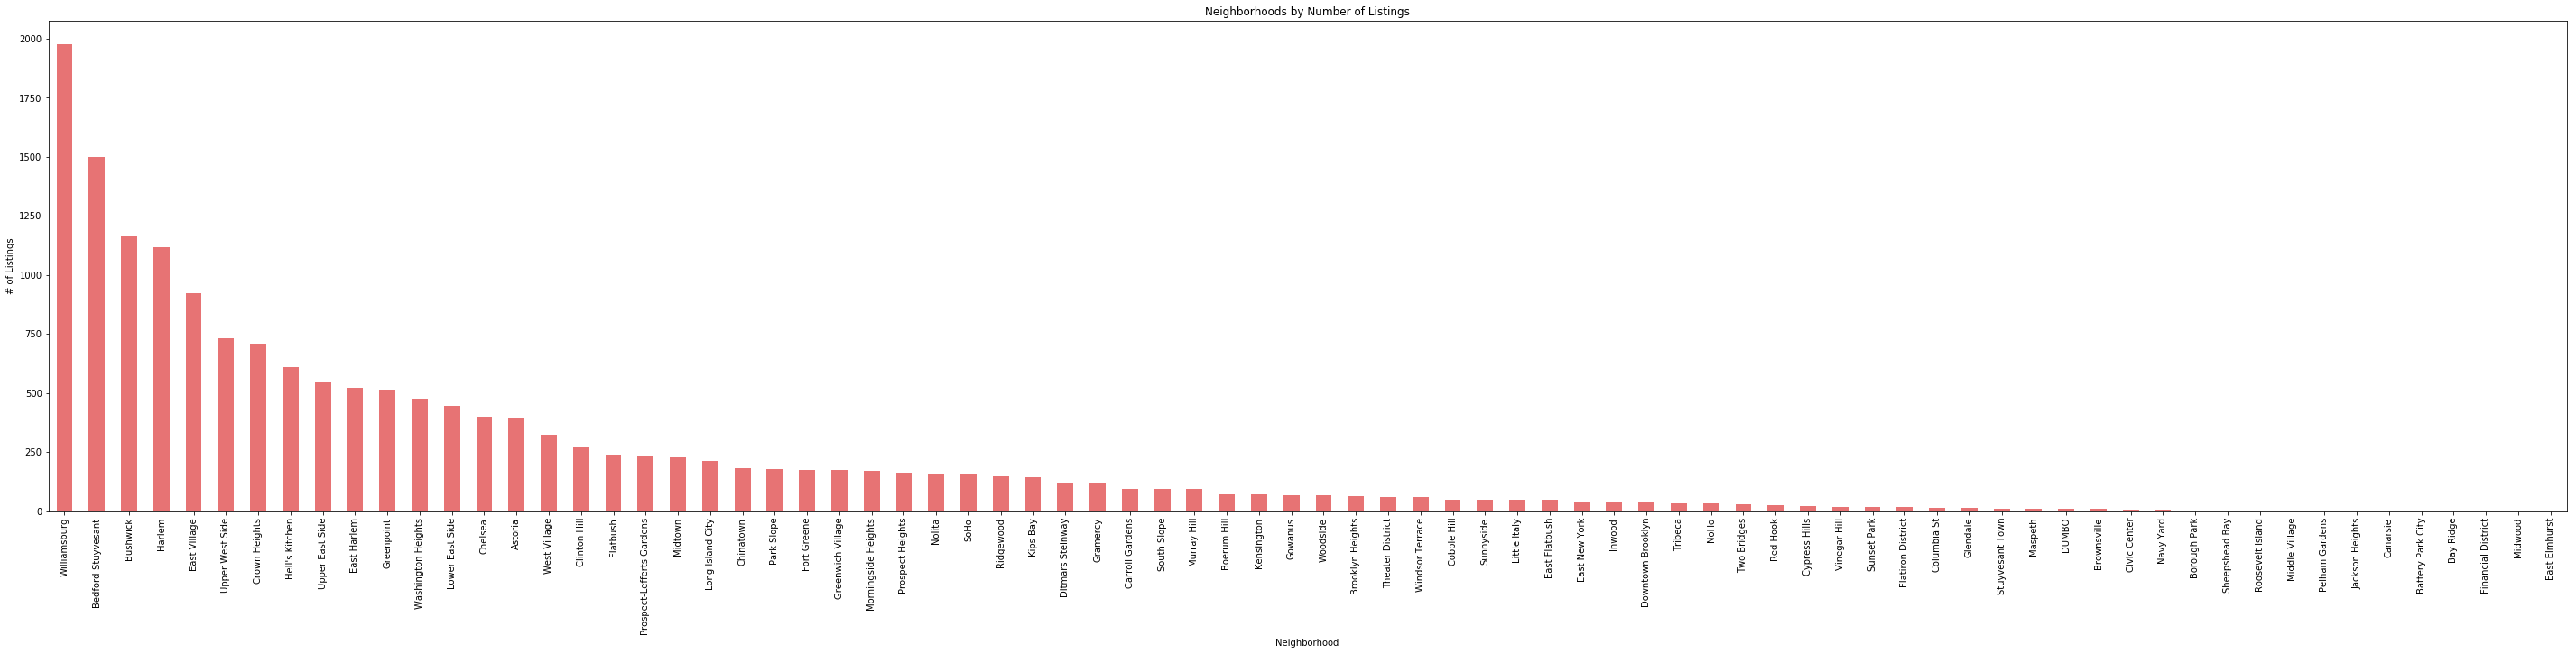

Number of Neighborhoods: 78


In [0]:
# Focus on neighbourhood_cleansed

# Get number of listings in neighborhoods
count_per_neighborhood = listings_zip_filtered['neighbourhood_cleansed'].value_counts()

# Plot number of listings in each neighborhood
ax = count_per_neighborhood.plot(kind='bar', figsize = (50,10), color = '#E35A5C', alpha = 0.85)
ax.set_title("Neighborhoods by Number of Listings")
ax.set_xlabel("Neighborhood")
ax.set_ylabel("# of Listings")
plt.show()

print("Number of Neighborhoods:", len(count_per_neighborhood))

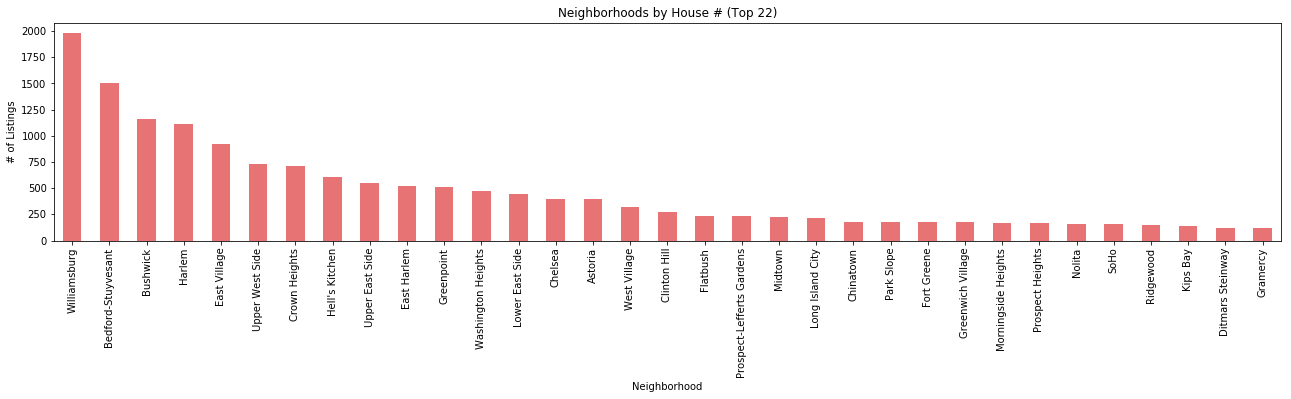

Number of entries removed:  1335


In [0]:
relevant_neighborhoods = count_per_neighborhood[count_per_neighborhood > 100].index
listings_neighborhood_filtered = listings_zip_filtered[listings_zip_filtered['neighbourhood_cleansed'].isin(relevant_neighborhoods)]

# Plot new neighborhoods distribution
count_per_neighborhood = listings_neighborhood_filtered['neighbourhood_cleansed'].value_counts()
ax = count_per_neighborhood.plot(kind='bar', figsize = (22,4), color = '#E35A5C', alpha = 0.85)
ax.set_title("Neighborhoods by House # (Top 22)")
ax.set_xlabel("Neighborhood")
ax.set_ylabel("# of Listings")

plt.show()

print('Number of entries removed: ', listings_zip_filtered.shape[0] - listings_neighborhood_filtered.shape[0])

In [0]:
print(listings_neighborhood_filtered.shape[0])
test= listings_neighborhood_filtered.groupby(['bedrooms'])
pd.set_option('display.max_columns', 300)
test.describe()
#listings_neighborhood_filtered.isnull() 

15417


accommodates                                                \
                count      mean       std  min  25%  50%  75%   max   
bedrooms                                                              
1.0           15145.0  1.980918  0.732314  1.0  2.0  2.0  2.0  16.0   
2.0             211.0  2.639810  1.216211  1.0  2.0  2.0  3.0   9.0   
3.0              45.0  2.200000  1.560886  1.0  2.0  2.0  2.0   9.0   
4.0              14.0  1.785714  0.425815  1.0  2.0  2.0  2.0   2.0   
5.0               2.0  1.000000  0.000000  1.0  1.0  1.0  1.0   1.0   

         availability_30                                                  \
                   count      mean        std  min  25%  50%   75%   max   
bedrooms                                                                   
1.0              15145.0  5.001321   8.093313  0.0  0.0  0.0   7.0  30.0   
2.0                211.0  4.336493   7.737697  0.0  0.0  0.0   5.0  30.0   
3.0                 45.0  5.511111   9.203809  0.0  0.0  0.0   7.0  30.0   
4.0                 14.0  4.714286   7.770047  0.0  0.0  0.5   5.5  23.0   
5.0                  2.0  9.000000  12.727922  0.0  4.5  9.0  13.5  18.0   

         availability_365                                                \
                    count        mean         std    min     25%    50%   
bedrooms                                                                  
1.0               15145.0  119.434995  135.370289    0.0    0.00   57.0   
2.0                 211.0  129.080569  137.165066    0.0    0.00   58.0   
3.0                  45.0  142.511111  139.074150    0.0    0.00   96.0   
4.0                  14.0  133.714286  134.223366    0.0    1.00   86.5   
5.0                   2.0  328.500000   34.648232  304.0  316.25  328.5   

                        availability_60                                   \
             75%    max           count       mean        std  min   25%   
bedrooms                                                                   
1.0       273.00  365.0         15145.0  15.122747  18.983020  0.0   0.0   
2.0       274.50  365.0           211.0  13.578199  18.178147  0.0   0.0   
3.0       286.00  365.0            45.0  15.111111  19.331113  0.0   0.0   
4.0       271.50  305.0            14.0  11.714286  18.474217  0.0   0.0   
5.0       340.75  353.0             2.0  24.000000  33.941125  0.0  12.0   

                            availability_90                              \
           50%    75%   max           count       mean        std   min   
bedrooms                                                                  
1.0        4.0  29.00  60.0         15145.0  26.699043  30.510546   0.0   
2.0        2.0  26.50  60.0           211.0  24.497630  29.294787   0.0   
3.0        2.0  30.00  60.0            45.0  27.444444  29.973136   0.0   
4.0        2.0  14.75  53.0            14.0  22.071429  28.877631   0.0   
5.0       24.0  36.00  48.0             2.0  53.500000  34.648232  29.0   

                                   bathrooms                                \
            25%   50%    75%   max     count      mean       std  min  25%   
bedrooms                                                                     
1.0        0.00  11.0  54.00  90.0   15145.0  1.082701  0.298920  0.0  1.0   
2.0        0.00   9.0  48.50  90.0     211.0  1.127962  0.320305  1.0  1.0   
3.0        0.00  16.0  54.00  90.0      45.0  1.122222  0.304429  1.0  1.0   
4.0        0.00   7.5  29.75  83.0      14.0  1.392857  0.487481  1.0  1.0   
5.0       41.25  53.5  65.75  78.0       2.0  1.000000  0.000000  1.0  1.0   

                            beds                                     \
          50%  75%  max    count mean  std  min  25%  50%  75%  max   
bedrooms                                                              
1.0       1.0  1.0  5.0  15145.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
2.0       1.0  1.0  2.0    211.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
3.0       1.0  1.0  2.0     45.0  1.0  0

In [0]:
useless = ['calculated_host_listings_count', 'availability_30', 'availability_60', 'availability_90', 'requires_license','require_guest_phone_verification']
listings_processed = listings_neighborhood_filtered.drop(useless, axis=1)

In [0]:
listings_processed = listings_processed.copy()
listings_processed['price'] = listings_processed['price'].str.replace('\$|,', '')
listings_processed['price'] = pd.to_numeric(listings_processed['price'])

listings_processed['extra_people'] = listings_processed['extra_people'].str.replace('\$|,', '')
listings_processed['extra_people'] = pd.to_numeric(listings_processed['extra_people'])

In [0]:
print(listings_processed)
listings_processed = pd.get_dummies(listings_processed)
listings_processed.shape

      host_is_superhost  host_total_listings_count neighbourhood_cleansed  \
36                    f                        1.0       Ditmars Steinway   
43                    f                        4.0       Ditmars Steinway   
45                    f                        1.0       Ditmars Steinway   
47                    t                        1.0       Ditmars Steinway   
49                    f                        1.0       Ditmars Steinway   
50                    t                        2.0       Ditmars Steinway   
53                    f                        1.0       Ditmars Steinway   
56                    f                        1.0       Ditmars Steinway   
57                    f                        1.0       Ditmars Steinway   
59                    t                        2.0       Ditmars Steinway   
60                    f                        5.0       Ditmars Steinway   
61                    f                        5.0       Ditmars Steinway   

(15417, 156)

In [0]:
import numpy as np
from sklearn.utils import shuffle
listings_processed = shuffle(listings_processed)
#listings_processed = listings_processed.dropna()

listings_processed = listings_processed.dropna()
listings_processed.apply(pd.to_numeric)

print(listings_processed.shape);

# Extract features and labels
y = listings_processed['price']
X = listings_processed.drop('price', axis = 1)

# Training and Testing Sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 0)

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

x_train.shape, x_test.shape

(15331, 156)


((11498, 155), (3833, 155))

In [0]:
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from math import sqrt
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error


# gridsearchcv for Ridge Regression
ridge =  Ridge_Reg()
ridge.fit(x_train, y_train)
predictions = ridge.predict(x_test)
print ('Before cross-validation, the ridge regression score is',ridge.score(x_test, y_test))
print('mean_absolute_error:\t$%.2f' % mean_absolute_error(y_test, predictions))
print("Median Absolute Error: " + str(round(median_absolute_error(predictions, y_test), 2)))
RMSE = round(sqrt(mean_squared_error(predictions, y_test)), 2)
print("Root mean_squared_error: " + str(RMSE))
print("seventh step")



# parameters to tune
parameters = {"alpha": [.0001, .001, .01, .1, 1, 10, 100, 1000]}
gs = GridSearchCV(ridge, parameters, n_jobs=10, cv=5)
gs.fit(x_train, y_train)
best = gs.best_estimator_
# print details of the new model
print ('Best Alpha:', best.alpha)
print("Eigth step")

best_ridge = Ridge_Reg(normalize=True, alpha = best.alpha)
best_ridge.fit(x_train, y_train)
predictions = best_ridge.predict(x_test)

print ('After cross-validation, the ridge regression score is', best_ridge.score(x_test, y_test))
print('mean_absolute_error:\t$%.2f' % mean_absolute_error(y_test, predictions))
print("Median Absolute Error: " + str(round(median_absolute_error(y_test,predictions), 2)))
RMSE = round(sqrt(mean_squared_error(predictions, y_test)), 2)
print("Root mean_squared_error: " + str(RMSE))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.302138e-18
  overwrite_a=True).T


Before cross-validation, the ridge regression score is 0.4871195771207675
mean_absolute_error:	$29.18
Median Absolute Error: 19.49
Root mean_squared_error: 46.86
seventh step
Best Alpha: 0.0001
Eigth step
After cross-validation, the ridge regression score is 0.48782910255915535
mean_absolute_error:	$29.15
Median Absolute Error: 19.38
Root mean_squared_error: 46.83


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.448960e-22
  overwrite_a=True).T
